# final project-  EDA hotal booking

## Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Load the Dataset

In [ ]:
df = pd.read_csv('hotel_booking.csv')

df.head()

,hotel+A1:AK1,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03/07/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Inspect the Dataset

In [ ]:
print("\nFirst 5 Rows:")
print(df.head())

print("\nBasic info:")
df.info()

print("\nSummary Statistics (Categorical Columns):")
print(df.describe(include=['O']))

print("\nMissing Values per Column:")
df.isnull().sum()


First 5 Rows:
   hotel+A1:AK1  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Tr

hotel+A1:AK1                           0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Handle Missing Data

In [ ]:
df['children'] = df['children'].fillna(df['children'].median())

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df.isnull().sum()

hotel+A1:AK1                      0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Create a Booking ID Column:

In [ ]:
df['booking_id'] = (df.index + 1).astype(str)
print(df.head())


   hotel+A1:AK1  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...   adr  \
0                        0                     0       2  ...   0.0   
1                     

## Univariate Analysis: Hotel Type

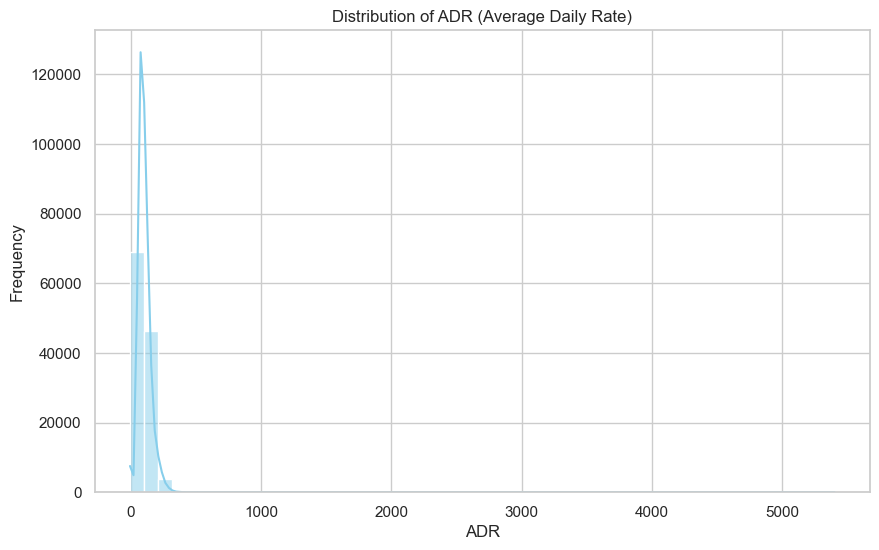

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()


## Univariate Analysis: Hotel Type

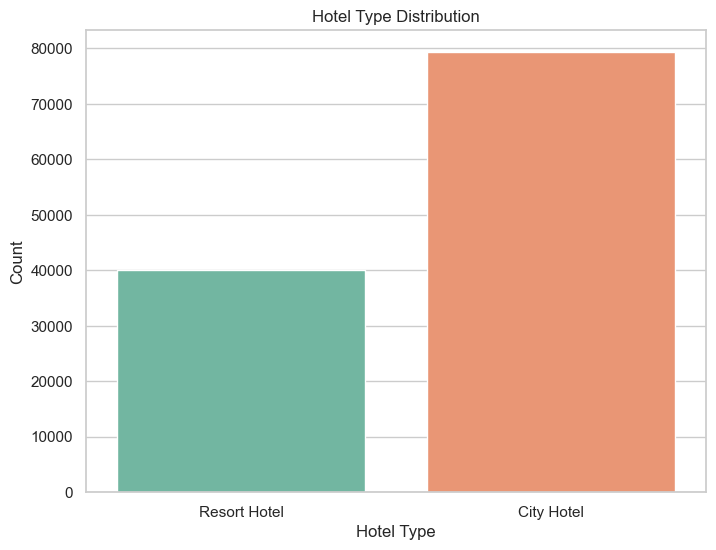

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel+A1:AK1', data=df, hue='hotel+A1:AK1', palette='Set2', legend=False)
plt.title('Hotel Type Distribution')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

## Next Analysis: Cancellations

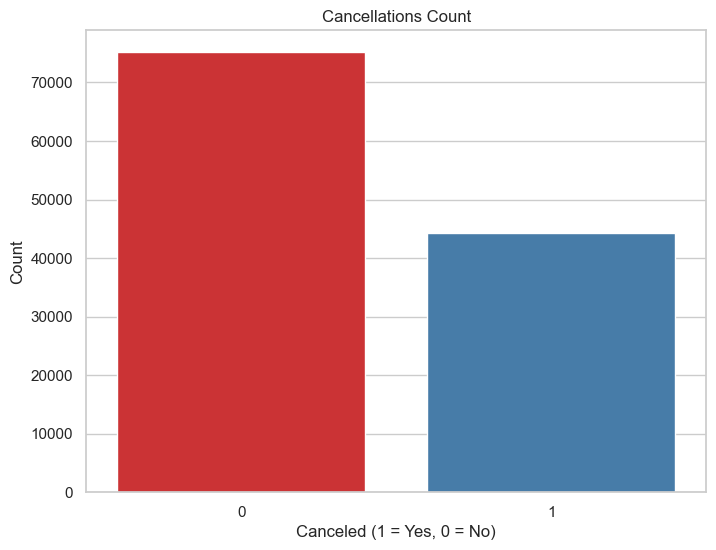

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df, hue='is_canceled', palette='Set1', legend=False)
plt.title('Cancellations Count')
plt.xlabel('Canceled (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

## Country Analysis:

### Count Bookings by Country

In [ ]:
country_bookings = df['country'].value_counts().reset_index()

country_bookings.columns = ['country', 'num_bookings']

print(country_bookings.head(10))

  country  num_bookings
0     PRT         49078
1     GBR         12129
2     FRA         10415
3     ESP          8568
4     DEU          7287
5     ITA          3766
6     IRL          3375
7     BEL          2342
8     BRA          2224
9     NLD          2104


### Visualize the Largest Sources of Bookings

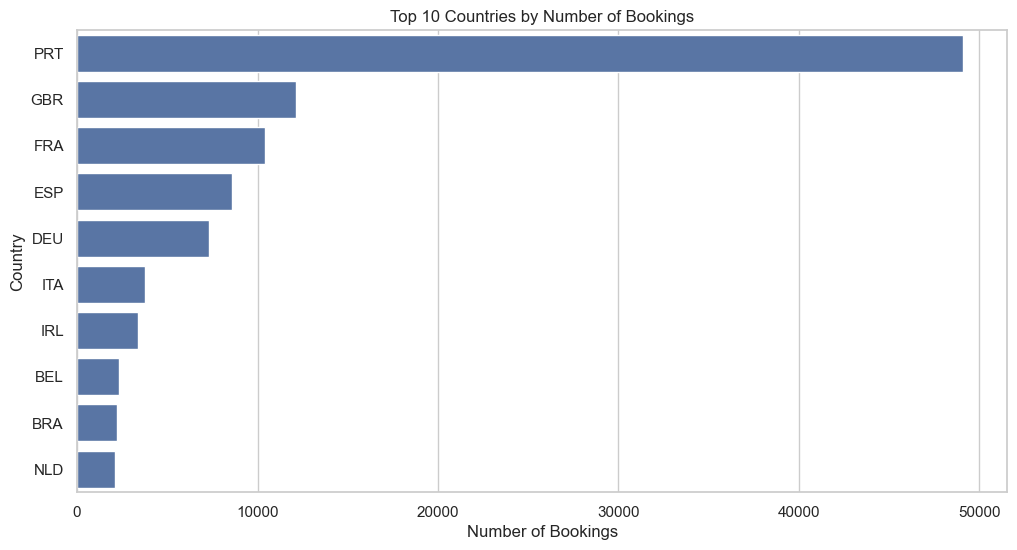

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_bookings', y='country', data=country_bookings.head(10))

plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()


## To save the modified DataFrame to a new CSV file:

In [ ]:
df.to_csv('hotel_booking_updated.csv', index=False)

## Cancellation Rate by Hotel Type:

In [ ]:
df.rename(columns={'hotel+A1:AK1': 'hotel'}, inplace=True)

cancellation_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()
cancellation_by_hotel.columns = ['Hotel Type', 'Cancellation Rate']

print(cancellation_by_hotel)


     Hotel Type  Cancellation Rate
0    City Hotel           0.417270
1  Resort Hotel           0.277634


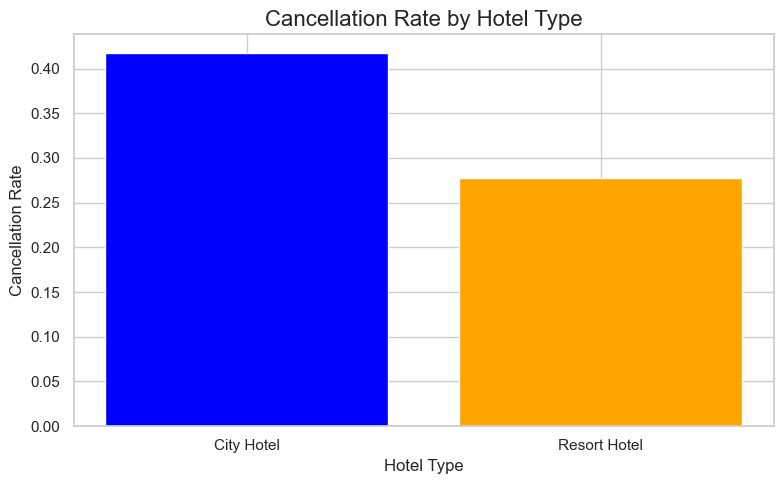

In [ ]:
import matplotlib.pyplot as plt

cancellation_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

cancellation_by_hotel.columns = ['Hotel Type', 'Cancellation Rate']

plt.figure(figsize=(8, 5))
plt.bar(cancellation_by_hotel['Hotel Type'], cancellation_by_hotel['Cancellation Rate'], color=['blue', 'orange'])

plt.title('Cancellation Rate by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)

plt.tight_layout()
plt.show()


### Cancellation by Customer Type

In [ ]:
cancellation_by_customer_type = df.groupby('customer_type')['is_canceled'].mean().reset_index()
cancellation_by_customer_type.columns = ['Customer Type', 'Cancellation Rate']

print(cancellation_by_customer_type)


     Customer Type  Cancellation Rate
0         Contract           0.309617
1            Group           0.102253
2        Transient           0.407463
3  Transient-Party           0.254299


### Distribution Channel Analysis

In [ ]:
cancellation_by_channel = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()
cancellation_by_channel.columns = ['Distribution Channel', 'Cancellation Rate']

print(cancellation_by_channel)


  Distribution Channel  Cancellation Rate
0            Corporate           0.220758
1               Direct           0.174599
2                  GDS           0.191710
3                TA/TO           0.410259
4            Undefined           0.800000


## Revenue Loss due to Cancellations

In [ ]:
revenue_loss = df[df['is_canceled'] == 1]['adr'].sum()
potential_revenue = df['adr'].sum()
loss_percentage = (revenue_loss / potential_revenue) * 100

print(f"Estimated Revenue Loss due to Cancellations: {loss_percentage:.2f}%")


Estimated Revenue Loss due to Cancellations: 38.18%


## Cancellation Rate by Market Segment

In [ ]:
cancellation_by_market_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()
cancellation_by_market_segment.columns = ['Market Segment', 'Cancellation Rate']

print(cancellation_by_market_segment)


  Market Segment  Cancellation Rate
0       Aviation           0.219409
1  Complementary           0.130552
2      Corporate           0.187347
3         Direct           0.153419
4         Groups           0.610620
5  Offline TA/TO           0.343160
6      Online TA           0.367211
7      Undefined           1.000000


In [ ]:
total_revenue = df['adr'].sum()
canceled_revenue = df[df['is_canceled'] == 1]['adr'].sum()
loss_percentage = (canceled_revenue / total_revenue) * 100

print(f"Overall Revenue Loss due to Cancellations: {loss_percentage:.2f}%")

revenue_loss_by_hotel = df[df['is_canceled'] == 1].groupby('hotel')['adr'].sum()
total_revenue_by_hotel = df.groupby('hotel')['adr'].sum()
loss_percentage_by_hotel = (revenue_loss_by_hotel / total_revenue_by_hotel) * 100

print("\nRevenue Loss by Hotel Type:")
print(loss_percentage_by_hotel)

revenue_loss_by_market_segment = df[df['is_canceled'] == 1].groupby('market_segment')['adr'].sum()
total_revenue_by_market_segment = df.groupby('market_segment')['adr'].sum()
loss_percentage_by_market_segment = (revenue_loss_by_market_segment / total_revenue_by_market_segment) * 100

print("\nRevenue Loss by Market Segment:")
print(loss_percentage_by_market_segment)


Overall Revenue Loss due to Cancellations: 38.18%

Revenue Loss by Hotel Type:
hotel
City Hotel      41.482657
Resort Hotel    30.931140
Name: adr, dtype: float64

Revenue Loss by Market Segment:
market_segment
Aviation          22.455430
Complementary      7.266259
Corporate         21.375061
Direct            16.493193
Groups            62.215746
Offline TA/TO     37.273366
Online TA         38.521269
Undefined        100.000000
Name: adr, dtype: float64


In [ ]:
df_clean = df[df['adr'].notna()]

total_revenue = df_clean['adr'].sum()
canceled_revenue = df_clean[df_clean['is_canceled'] == 1]['adr'].sum()
loss_percentage = (canceled_revenue / total_revenue) * 100 if total_revenue != 0 else 0

print(f"Overall Revenue Loss due to Cancellations: {loss_percentage:.2f}%")

revenue_loss_by_hotel = df_clean[df_clean['is_canceled'] == 1].groupby('hotel')['adr'].sum()
total_revenue_by_hotel = df_clean.groupby('hotel')['adr'].sum()
loss_percentage_by_hotel = (revenue_loss_by_hotel / total_revenue_by_hotel) * 100

loss_percentage_by_hotel = loss_percentage_by_hotel.fillna(0)

print("\nRevenue Loss by Hotel Type:")
print(loss_percentage_by_hotel)

revenue_loss_by_market_segment = df_clean[df_clean['is_canceled'] == 1].groupby('market_segment')['adr'].sum()
total_revenue_by_market_segment = df_clean.groupby('market_segment')['adr'].sum()
loss_percentage_by_market_segment = (revenue_loss_by_market_segment / total_revenue_by_market_segment) * 100

loss_percentage_by_market_segment = loss_percentage_by_market_segment.fillna(0)

print("\nRevenue Loss by Market Segment:")
print(loss_percentage_by_market_segment)


Overall Revenue Loss due to Cancellations: 38.18%

Revenue Loss by Hotel Type:
hotel
City Hotel      41.482657
Resort Hotel    30.931140
Name: adr, dtype: float64

Revenue Loss by Market Segment:
market_segment
Aviation          22.455430
Complementary      7.266259
Corporate         21.375061
Direct            16.493193
Groups            62.215746
Offline TA/TO     37.273366
Online TA         38.521269
Undefined        100.000000
Name: adr, dtype: float64


##  Impact of Special Requests on Cancellations

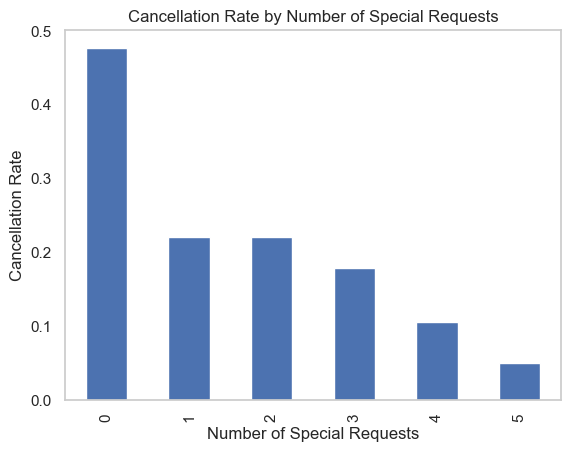

In [ ]:
special_requests_cancellations = df.groupby('total_of_special_requests')['is_canceled'].mean()

special_requests_cancellations.plot(kind='bar')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

## Cancellation Rates by Customer Type

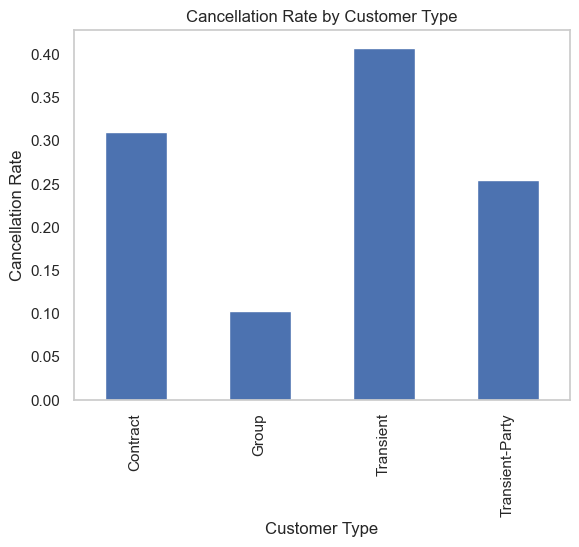

In [ ]:
cancellation_by_customer_type = df.groupby('customer_type')['is_canceled'].mean()

cancellation_by_customer_type.plot(kind='bar')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()


## Analysis of Cancellations by Deposit Type


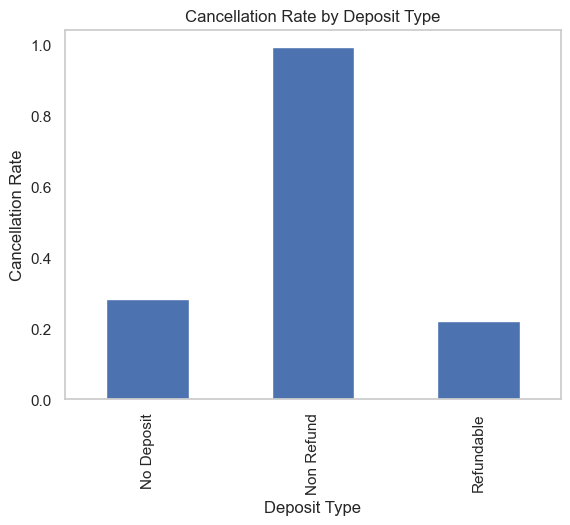

In [ ]:
cancellation_by_deposit_type = df.groupby('deposit_type')['is_canceled'].mean()

cancellation_by_deposit_type.plot(kind='bar')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

## Cancellation Rate by Market Segment

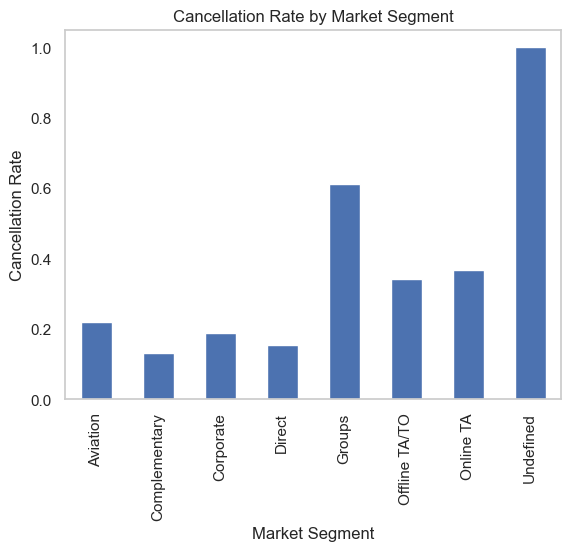

In [ ]:
cancellation_by_segment = df.groupby('market_segment')['is_canceled'].mean()

cancellation_by_segment.plot(kind='bar')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

## Cancellation by Room Type

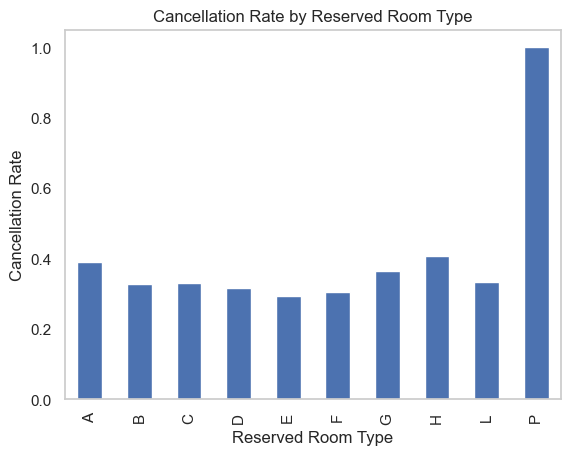

In [ ]:
cancellation_by_room_type = df.groupby('reserved_room_type')['is_canceled'].mean()

cancellation_by_room_type.plot(kind='bar')
plt.title('Cancellation Rate by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()

## cancellation by Customer Type

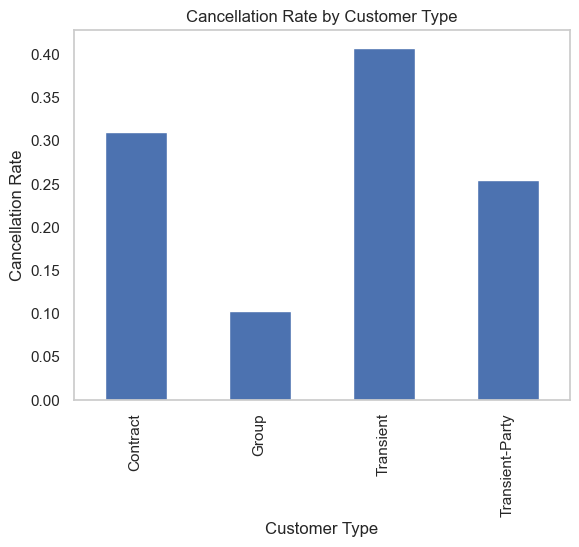

In [ ]:
cancellation_by_customer_type = df.groupby('customer_type')['is_canceled'].mean()

cancellation_by_customer_type.plot(kind='bar')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.grid()
plt.show()